# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_csv('data/kc_house_data.csv')

In [12]:
df.loc[df['id']==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [33]:
df.loc[df.sqft_lot == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0.0,0.0,0,0
18,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0.0,0.0,0,0
42,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0.0,0.0,0,0
79,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0.0,0.0,0,0
112,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0.0,0.0,0,0
21447,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0.0,0.0,0,0
21473,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0.0,0.0,0,0
21519,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0.0,0.0,0,0


In [34]:
drop_0 = df.loc[df.id == 0].index

In [35]:
drop_0

Int64Index([    6,    18,    42,    79,   112,   115,   217,   309,   384,
              508,
            ...
            21236, 21248, 21356, 21357, 21365, 21442, 21447, 21473, 21519,
            21581],
           dtype='int64', length=454)

In [36]:
df = df.drop(index=drop_0)

In [37]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [38]:
df.loc[df.id == 0].index

Int64Index([], dtype='int64')

In [39]:
df.loc[df.id==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [40]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [41]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [10]:
df.sqft_living

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21597, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

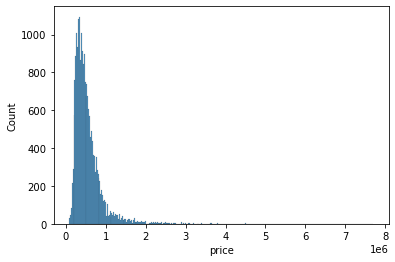

In [11]:
sns.histplot(df.price)

<AxesSubplot:ylabel='Count'>

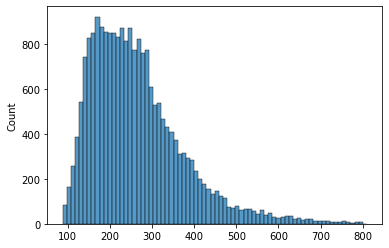

In [12]:
sns.histplot(df.price/df.sqft_living)

<AxesSubplot:ylabel='Count'>

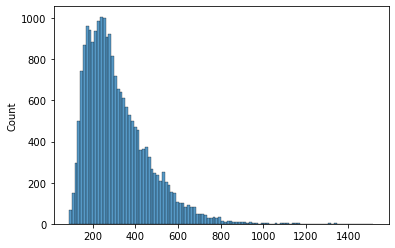

In [13]:
sns.histplot(df.price/(df.sqft_above))

In [14]:
#sns.histplot(df.price/(df.sqft_basement))

In [19]:
df.sqft_basement

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object

In [20]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
274.0         1
374.0         1
588.0         1
2196.0        1
1920.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [17]:
df.sqft_basement.apply(lambda x: 0 if x == '?')

SyntaxError: invalid syntax (<ipython-input-17-0d64361ad733>, line 1)

In [43]:
df_b = df

In [23]:
df_b.loc[df_b['sqft_basement']=='?'] = 0

In [44]:
df_b.sqft_basement.describe()

count     21143
unique      303
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [51]:
df_b['sqft_basement_float'] = df_b.sqft_basement.apply(lambda x: float(x))

In [52]:
df_b['sqft_basement_float']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement_float, Length: 21143, dtype: float64

In [53]:
df_b['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21143, dtype: float64

<AxesSubplot:ylabel='Count'>

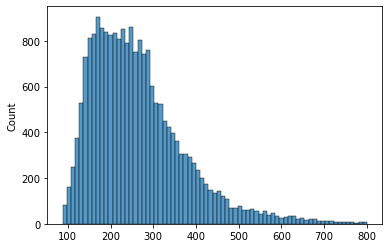

In [54]:
sns.histplot(df_b.price/(df_b.sqft_basement_float+df_b.sqft_above))

In [55]:
import numpy as np

C:\Users\Nel-Jiren\Anaconda\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

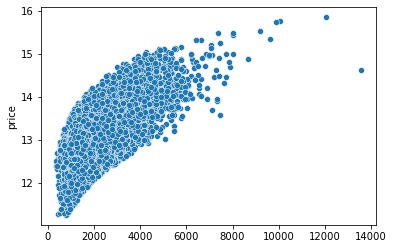

In [56]:
sns.scatterplot((df_b.sqft_basement_float+df_b.sqft_above),np.log(df_b.price))

In [57]:
#compare R2 for price and log(price)
#single variable regression

C:\Users\Nel-Jiren\Anaconda\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

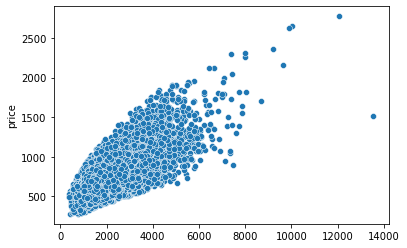

In [58]:
sns.scatterplot((df_b.sqft_basement_float+df_b.sqft_above),np.sqrt(df_b.price))

# Columns Cleanup

In [59]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_float
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,400.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,910.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0


In [60]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_basement_float'],
      dtype='object')

## ID - Drop it

In [62]:
df.id

0        7129300520
1        6414100192
2        5631500400
3        2487200875
4        1954400510
            ...    
21592     263000018
21593    6600060120
21594    1523300141
21595     291310100
21596    1523300157
Name: id, Length: 21143, dtype: int64

## Date - Decide after rest of data

In [63]:
df.date

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21143, dtype: object

In [64]:
df['date'][0][-4:]

'2014'

In [65]:
def get_year(date):
    return date[-4:]

In [66]:
df['date'].apply(lambda x: str(x)[-4:])

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21592    2014
21593    2015
21594    2014
21595    2015
21596    2014
Name: date, Length: 21143, dtype: object

In [67]:
df['date'].apply(lambda x: str(x)[-4:]).value_counts()

2014    14305
2015     6838
Name: date, dtype: int64

In [68]:
df['date'].loc[df.date == 0]

Series([], Name: date, dtype: object)

(array([14305.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,  6838.]),
 array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    ]),
 <BarContainer object of 16 artists>)

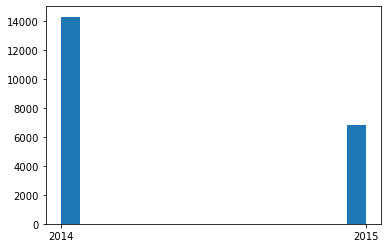

In [69]:
plt.hist(df['date'].apply(lambda x: str(x)[-4:]), bins='auto')

## Bedrooms - keep, consider converting to categorical

In [70]:
df.bedrooms

0        3
1        3
2        2
3        4
4        3
        ..
21592    3
21593    4
21594    2
21595    3
21596    2
Name: bedrooms, Length: 21143, dtype: int64

In [71]:
df.bedrooms.value_counts()

3     9639
4     6740
2     2691
5     1560
6      262
1      191
7       36
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [72]:
### investigate the top bedrooms

In [73]:
df.loc[df.bedrooms >= 10].index

Int64Index([8748, 13301, 15147, 15856, 19239], dtype='int64')

In [74]:
df.iloc[8748]

id                     106000044
date                   8/26/2014
price                     399950
bedrooms                       3
bathrooms                      1
sqft_living                 1470
sqft_lot                    7930
floors                         1
waterfront                     0
view                           0
condition                      3
grade                          7
sqft_above                  1070
sqft_basement              400.0
yr_built                    1950
yr_renovated                   0
zipcode                    98177
lat                      47.7013
long                    -122.368
sqft_living15               1440
sqft_lot15                  8100
sqft_basement_float          400
Name: 8925, dtype: object

In [75]:
#keep 8748

In [76]:
df.iloc[13301]

id                     4024101395
date                    5/13/2014
price                      370000
bedrooms                        3
bathrooms                    1.75
sqft_living                  1650
sqft_lot                     8254
floors                          1
waterfront                      0
view                            0
condition                       5
grade                           7
sqft_above                   1060
sqft_basement               590.0
yr_built                     1951
yr_renovated                    0
zipcode                     98155
lat                       47.7596
long                     -122.304
sqft_living15                2280
sqft_lot15                   9450
sqft_basement_float           590
Name: 13577, dtype: object

In [77]:
#1150000
#keep, luxury home

In [78]:
df.iloc[15147]

id                     4029400080
date                     4/6/2015
price                      383000
bedrooms                        4
bathrooms                     2.5
sqft_living                  1850
sqft_lot                     8310
floors                          1
waterfront                      0
view                            0
condition                       3
grade                           7
sqft_above                   1200
sqft_basement               650.0
yr_built                     1962
yr_renovated                    0
zipcode                     98155
lat                       47.7717
long                      -122.29
sqft_living15                1840
sqft_lot15                  10080
sqft_basement_float           650
Name: 15470, dtype: object

In [79]:
#keep, luxury

In [80]:
df.iloc[15856]

id                     6073500190
date                    8/21/2014
price                      614306
bedrooms                        2
bathrooms                    2.25
sqft_living                  2210
sqft_lot                     5500
floors                          1
waterfront                    NaN
view                            0
condition                       4
grade                           8
sqft_above                   1410
sqft_basement               800.0
yr_built                     1968
yr_renovated                    0
zipcode                     98117
lat                        47.697
long                      -122.39
sqft_living15                2140
sqft_lot15                   6600
sqft_basement_float           800
Name: 16203, dtype: object

In [81]:
#drop 15856

In [82]:
df.iloc[19239]

id                     7899800863
date                    10/1/2014
price                      299900
bedrooms                        3
bathrooms                     2.5
sqft_living                  1210
sqft_lot                     2046
floors                          2
waterfront                      0
view                            0
condition                       3
grade                           9
sqft_above                    920
sqft_basement               290.0
yr_built                     2008
yr_renovated                  NaN
zipcode                     98106
lat                       47.5212
long                     -122.357
sqft_living15                1070
sqft_lot15                    651
sqft_basement_float           290
Name: 19653, dtype: object

In [83]:
# keep

## bathrooms - Consider what to do about the 0, .5, and .75 bathrooms, re-bin (round down)

In [85]:
df.bathrooms

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21592    2.50
21593    2.50
21594    0.75
21595    2.50
21596    0.75
Name: bathrooms, Length: 21143, dtype: float64

In [86]:
df.bathrooms.value_counts()

2.50    5255
1.00    3757
1.75    2991
2.25    2014
2.00    1886
1.50    1422
2.75    1160
3.00     736
3.50     719
3.25     574
3.75     152
4.00     135
4.50      96
4.25      79
0.75      71
4.75      23
5.00      19
5.25      13
1.25       9
5.50       9
6.00       6
5.75       4
0.50       3
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

## sqft living - continuous, consider what to do about outliers, fixed after PSF conversion?

In [87]:
df.sqft_living

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21143, dtype: int64

In [88]:
df.sqft_living.describe()

count    21143.000000
mean      2080.920730
std        918.547562
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [89]:
df.sqft_living.sort_values()

15367      370
860        380
21316      390
8614       410
11488      420
         ...  
8085      9640
9245      9890
3910     10040
7245     12050
12764    13540
Name: sqft_living, Length: 21143, dtype: int64

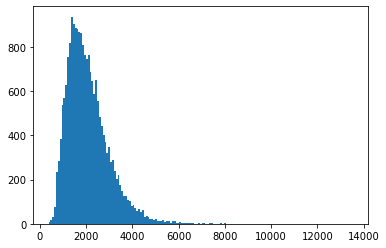

In [90]:
plt.hist(df.sqft_living, bins='auto');

In [91]:
(df.sqft_living == 0).value_counts()

False    21143
Name: sqft_living, dtype: int64

## sqft lot - keep the lotsize, consider maybe a house : lot ratio? maybe split into 2 models?

In [92]:
df.sqft_lot

0         5650
1         7242
2        10000
3         5000
4         8080
         ...  
21592     1131
21593     5813
21594     1350
21595     2388
21596     1076
Name: sqft_lot, Length: 21143, dtype: int64

In [93]:
df.sqft_lot.describe()

count    2.114300e+04
mean     1.508714e+04
std      4.120920e+04
min      5.200000e+02
25%      5.043000e+03
50%      7.620000e+03
75%      1.069550e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [94]:
df.sqft_lot.value_counts()

5000     348
6000     286
4000     244
7200     218
7500     119
        ... 
11212      1
9165       1
41300      1
17377      1
14321      1
Name: sqft_lot, Length: 9643, dtype: int64

In [97]:
df.loc[df.sqft_lot == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_float


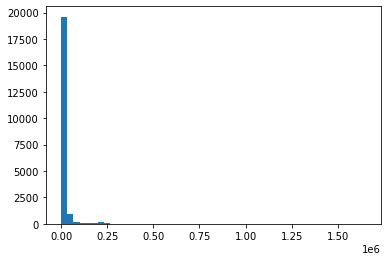

In [110]:
plt.hist(df.sqft_lot, bins=50);

In [104]:
df.sqft_lot.describe()
df.sqft_lot.sort_values()

15729        520
5821         572
7582         600
3449         609
20588        635
          ...   
3945      982998
7762     1024068
7640     1074218
17305    1164794
1717     1651359
Name: sqft_lot, Length: 21143, dtype: int64

In [108]:
df.loc[df.sqft_lot == 1651359]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_float
1717,1020069017,3/27/2015,700000.0,4,1.0,1300,1651359,1.0,0.0,3.0,...,1300,0.0,1920,0.0,98022,47.2313,-122.023,2560,425581,0.0


## floors - categorical, what do do about half floors?

In [112]:
df.floors

0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
21592    3.0
21593    2.0
21594    2.0
21595    2.0
21596    2.0
Name: floors, Length: 21143, dtype: float64

In [113]:
df.floors.value_counts()

1.0    10456
2.0     8066
1.5     1865
3.0      593
2.5      156
3.5        7
Name: floors, dtype: int64

## Waterfront - categorical, has and does not have, how to fix nan values : np.nan, convert to strings then remove

In [158]:
df.waterfront

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21592    0.0
21593    0.0
21594    0.0
21595    NaN
21596    0.0
Name: waterfront, Length: 21143, dtype: float64

In [159]:
df.waterfront.value_counts()

0.0    18662
1.0      142
Name: waterfront, dtype: int64

In [118]:
142/18662

0.007609045118422463

In [119]:
df.loc[df.waterfront ==1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_float
49,822039084,3/11/2015,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,...,2165,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513,588.0
230,8096000060,4/13/2015,655000.0,2,1.75,1450,15798,2.0,1.0,4.0,...,1230,220.0,1915,1978.0,98166,47.4497,-122.375,2030,13193,220.0
246,2025069065,9/29/2014,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,...,1830,1820.0,2000,0.0,98074,47.6338,-122.072,3120,18841,1820.0
264,2123039032,10/27/2014,369900.0,1,0.75,760,10079,1.0,1.0,4.0,...,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267,0.0
300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,...,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2025069140,3/17/2015,1900000.0,3,2.50,2830,4334,3.0,1.0,4.0,...,2830,0.0,2006,0.0,98074,47.6318,-122.071,2830,38211,0.0
20309,518500480,8/11/2014,3000000.0,3,3.50,4410,10756,2.0,1.0,4.0,...,3430,980.0,2014,0.0,98056,47.5283,-122.205,3550,5634,980.0
20751,8043700105,4/17/2015,2300000.0,4,4.00,4360,8175,2.5,1.0,4.0,...,3940,420.0,2007,0.0,98008,47.5724,-122.104,2670,8525,420.0
21185,518500460,10/8/2014,2230000.0,3,3.50,3760,5634,2.0,1.0,4.0,...,2830,930.0,2014,0.0,98056,47.5285,-122.205,3560,5762,930.0


In [156]:
df.waterfront[0]

nan

In [131]:
type(df.waterfront[0])

numpy.float64

In [157]:
df.loc[df.waterfront == np.nan]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_float


In [155]:
np.nan

nan

In [154]:
df.waterfront.unique()

array([nan,  0.,  1.])

## view - what does this mean?  categorical

In [134]:
df.view

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21592    0.0
21593    0.0
21594    0.0
21595    0.0
21596    0.0
Name: view, Length: 21143, dtype: float64

In [135]:
df.view.describe()

count    21082.000000
mean         0.233327
std          0.765066
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [136]:
df.view.value_counts()

0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [166]:
df.waterfront.apply(lambda x: str(x)) == 'nan'

0         True
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595     True
21596    False
Name: waterfront, Length: 21143, dtype: bool

## condition - categorical?

In [137]:
df.condition

0        3
1        3
2        3
3        5
4        3
        ..
21592    3
21593    3
21594    3
21595    3
21596    3
Name: condition, Length: 21143, dtype: int64

In [139]:
df.condition.describe()

count    21143.000000
mean         3.409923
std          0.650498
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [140]:
df.condition.value_counts()

3    13726
4     5557
5     1666
2      166
1       28
Name: condition, dtype: int64

(array([   28.,   166., 13726.,  5557.,  1666.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

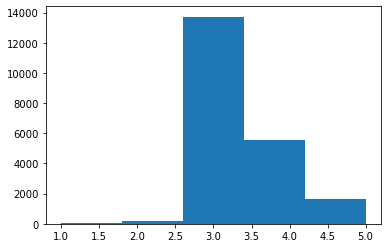

In [168]:
plt.hist(df.condition, bins=5)

## grade - keep, normally distributed, categorical?

In [143]:
df.grade

0        7
1        7
2        6
3        7
4        8
        ..
21592    8
21593    8
21594    7
21595    8
21596    7
Name: grade, Length: 21143, dtype: int64

In [144]:
df.grade.describe()

count    21143.000000
mean         7.658279
std          1.174253
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [145]:
df.grade.value_counts()

7     8788
8     5933
9     2557
6     1997
10    1112
11     391
5      235
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

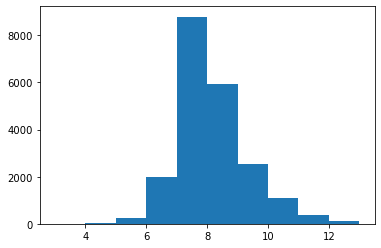

In [147]:
plt.hist(df.grade);

## sqft above - keep as is, continuous

In [169]:
df.sqft_above

0        1180
1        2170
2         770
3        1050
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_above, Length: 21143, dtype: int64

In [170]:
df.sqft_above.describe()

count    21143.000000
mean      1789.069006
std        828.409769
min        370.000000
25%       1200.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

<AxesSubplot:>

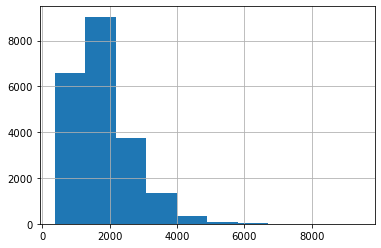

In [171]:
df.sqft_above.hist()

## Sqft_basement - convert to has or does not have

In [173]:
df.sqft_basement

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21143, dtype: object

In [174]:
df.sqft_basement.describe()

count     21143
unique      303
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [176]:
df.sqft_basement.astype(float).describe()

count    21143.000000
mean       291.851724
std        442.498337
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

(array([1.5215e+04, 3.8010e+03, 1.6970e+03, 3.4100e+02, 7.1000e+01,
        1.2000e+01, 2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   0.,  482.,  964., 1446., 1928., 2410., 2892., 3374., 3856.,
        4338., 4820.]),
 <BarContainer object of 10 artists>)

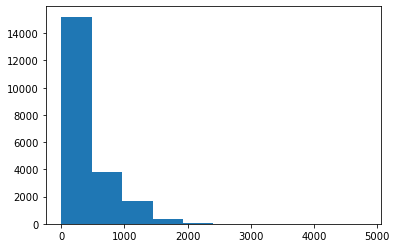

In [177]:
plt.hist(df.sqft_basement.astype(float))

## yr_built - leave as is

In [178]:
df.yr_built

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21592    2009
21593    2014
21594    2009
21595    2004
21596    2008
Name: yr_built, Length: 21143, dtype: int64

In [179]:
df.yr_built.describe()

count    21143.000000
mean      1971.023223
std         29.321938
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [180]:
df.yr_built.value_counts()

2014    542
2006    443
2005    435
2004    422
2003    416
       ... 
1933     30
1901     28
1902     27
1935     23
1934     21
Name: yr_built, Length: 116, dtype: int64

In [182]:
(df.yr_built == 1900).value_counts()

False    21059
True        84
Name: yr_built, dtype: int64

(array([ 832.,  845., 1128., 1197., 2669., 2885., 2757., 2528., 2803.,
        3499.]),
 array([1900. , 1911.5, 1923. , 1934.5, 1946. , 1957.5, 1969. , 1980.5,
        1992. , 2003.5, 2015. ]),
 <BarContainer object of 10 artists>)

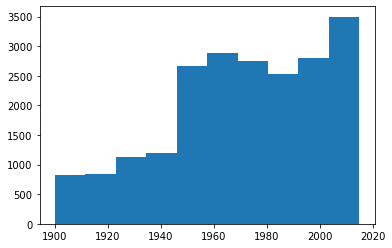

In [183]:
plt.hist(df.yr_built)

## yr_renovated - consider renovated within the last X amount of years, renovated recently or not, need to handle zeroes

In [184]:
df.yr_renovated

0           0.0
1        1991.0
2           NaN
3           0.0
4           0.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Length: 21143, dtype: float64

In [185]:
df.yr_renovated.describe()

count    17389.000000
mean        82.991949
std        398.481819
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

C:\Users\Nel-Jiren\Anaconda\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Nel-Jiren\Anaconda\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([16666.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   723.]),
 array([   0. ,  201.5,  403. ,  604.5,  806. , 1007.5, 1209. , 1410.5,
        1612. , 1813.5, 2015. ]),
 <BarContainer object of 10 artists>)

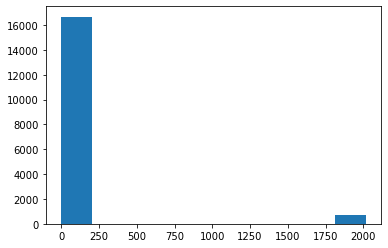

In [187]:
plt.hist(df.yr_renovated)

In [188]:
df.yr_renovated.value_counts()

0.0       16666
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64

(array([  3.,   5.,  14.,  18.,  31.,  43., 123., 101., 174., 211.]),
 array([1934. , 1942.1, 1950.2, 1958.3, 1966.4, 1974.5, 1982.6, 1990.7,
        1998.8, 2006.9, 2015. ]),
 <BarContainer object of 10 artists>)

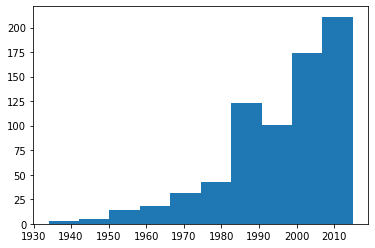

In [192]:
plt.hist(df['yr_renovated'].loc[df.yr_renovated > 0])

(array([ 42.,  42.,  65.,  37.,  35.,  71.,  69.,  94.,  44., 122.]),
 array([1981. , 1984.4, 1987.8, 1991.2, 1994.6, 1998. , 2001.4, 2004.8,
        2008.2, 2011.6, 2015. ]),
 <BarContainer object of 10 artists>)

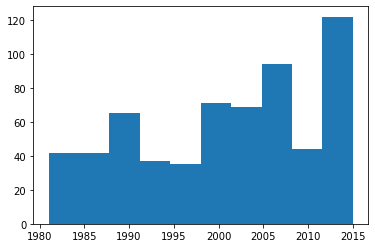

In [194]:
plt.hist(df['yr_renovated'].loc[df.yr_renovated > 1980])

## zipcode - should be categorical, but would lead to 70 categories - although it would make sense, might something to try in a larger scale project

In [195]:
df.zipcode

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21143, dtype: int64

In [196]:
df.zipcode.describe()

count    21143.000000
mean     98077.868893
std         53.535756
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98117.000000
max      98199.000000
Name: zipcode, dtype: float64

In [198]:
df.zipcode.value_counts()

98103    588
98038    574
98115    568
98052    562
98042    542
        ... 
98102    100
98010     98
98024     79
98148     55
98039     49
Name: zipcode, Length: 70, dtype: int64

(array([2814., 4278., 3278., 1663.,  342., 4158., 1767., 1105., 1021.,
         717.]),
 array([98001. , 98020.8, 98040.6, 98060.4, 98080.2, 98100. , 98119.8,
        98139.6, 98159.4, 98179.2, 98199. ]),
 <BarContainer object of 10 artists>)

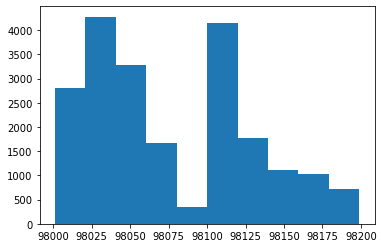

In [197]:
plt.hist(df.zipcode)

## lat and long - coordinates should be combined into a 2d space, separate out the mountain areas with larger square footages

In [199]:
df.lat

0        47.5112
1        47.7210
2        47.7379
3        47.5208
4        47.6168
          ...   
21592    47.6993
21593    47.5107
21594    47.5944
21595    47.5345
21596    47.5941
Name: lat, Length: 21143, dtype: float64

In [200]:
df.lat.describe()

count    21143.000000
mean        47.560274
std          0.138591
min         47.155900
25%         47.471250
50%         47.572000
75%         47.678200
max         47.777600
Name: lat, dtype: float64

(array([ 177.,  320., 1398., 1884., 1399., 2521., 3774., 2945., 3934.,
        2791.]),
 array([47.1559 , 47.21807, 47.28024, 47.34241, 47.40458, 47.46675,
        47.52892, 47.59109, 47.65326, 47.71543, 47.7776 ]),
 <BarContainer object of 10 artists>)

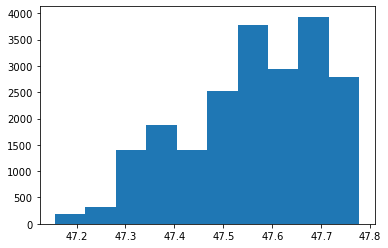

In [201]:
plt.hist(df.lat)

(array([4.130e+02, 8.620e+03, 5.542e+03, 3.823e+03, 2.043e+03, 4.730e+02,
        2.110e+02, 2.000e+00, 2.000e+00, 1.400e+01]),
 array([-122.519 , -122.3986, -122.2782, -122.1578, -122.0374, -121.917 ,
        -121.7966, -121.6762, -121.5558, -121.4354, -121.315 ]),
 <BarContainer object of 10 artists>)

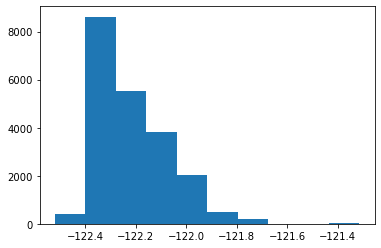

In [202]:
plt.hist(df.long)

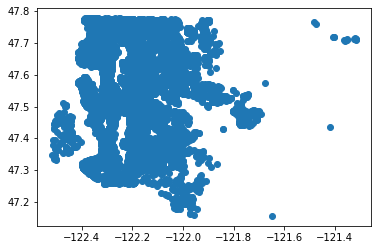

In [204]:
plt.scatter(df.long,df.lat)

In [205]:
df.loc[df.long > -121.7]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_float
2587,5061300030,5/8/2014,134000.0,2,1.50,980,5000,2.0,0.0,0.0,...,980,0.0,1922,2003.0,98014,47.7076,-121.359,1040,5000,0.0
2845,1723099031,10/20/2014,724950.0,4,3.50,3010,174240,2.0,0.0,0.0,...,3010,0.0,2004,0.0,98045,47.4775,-121.691,2720,247856,0.0
2925,8649401270,4/30/2015,167000.0,1,1.00,780,10235,1.5,0.0,0.0,...,780,0.0,1989,NaN,98014,47.7130,-121.315,930,10165,0.0
3292,9413400165,6/24/2014,380000.0,3,2.25,1860,15559,2.0,0.0,0.0,...,1860,0.0,1963,0.0,98022,47.1559,-121.646,1110,11586,0.0
4199,1437500015,7/9/2014,150000.0,3,0.75,490,38500,1.5,0.0,0.0,...,490,0.0,1959,0.0,98014,47.7112,-121.315,800,18297,0.0
4844,192300020,5/21/2014,525000.0,3,2.75,2100,10362,2.0,0.0,0.0,...,1510,590.0,1998,0.0,98045,47.4347,-121.417,2240,11842,590.0
5861,7349800780,8/5/2014,175000.0,2,1.75,1050,9800,1.5,NaN,0.0,...,1050,0.0,1975,0.0,98019,47.7595,-121.473,1230,12726,0.0
6083,5062300280,4/16/2015,150000.0,3,1.00,890,6488,1.5,0.0,0.0,...,890,0.0,1928,0.0,98014,47.7087,-121.352,1330,16250,0.0
6464,723099028,6/26/2014,320000.0,3,2.00,1550,34175,1.5,0.0,0.0,...,1550,0.0,1999,0.0,98045,47.4855,-121.698,2300,35174,0.0
10084,7805600070,11/11/2014,200000.0,2,1.75,1320,13052,1.5,0.0,0.0,...,1320,0.0,1980,0.0,98014,47.7120,-121.352,1320,13052,0.0


## sqft living15, cannot use because need PSF

In [206]:
df.sqft_living15

0        1340
1        1690
2        2720
3        1360
4        1800
         ... 
21592    1530
21593    1830
21594    1020
21595    1410
21596    1020
Name: sqft_living15, Length: 21143, dtype: int64

In [207]:
df.sqft_living15.describe()

count    21143.00000
mean      1987.27139
std        685.67034
min        399.00000
25%       1490.00000
50%       1840.00000
75%       2360.00000
max       6210.00000
Name: sqft_living15, dtype: float64

(array([ 300., 6301., 7412., 4117., 1964.,  718.,  229.,   82.,   12.,
           8.]),
 array([ 399. ,  980.1, 1561.2, 2142.3, 2723.4, 3304.5, 3885.6, 4466.7,
        5047.8, 5628.9, 6210. ]),
 <BarContainer object of 10 artists>)

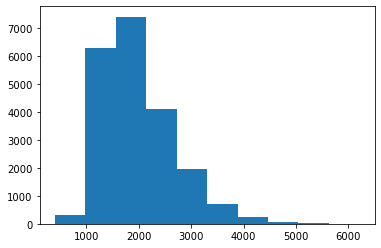

In [209]:
plt.hist(df.sqft_living15)

# Indexes to remove:

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21143 non-null  int64  
 1   date                 21143 non-null  object 
 2   price                21143 non-null  float64
 3   bedrooms             21143 non-null  int64  
 4   bathrooms            21143 non-null  float64
 5   sqft_living          21143 non-null  int64  
 6   sqft_lot             21143 non-null  int64  
 7   floors               21143 non-null  float64
 8   waterfront           18804 non-null  float64
 9   view                 21082 non-null  float64
 10  condition            21143 non-null  int64  
 11  grade                21143 non-null  int64  
 12  sqft_above           21143 non-null  int64  
 13  sqft_basement        21143 non-null  object 
 14  yr_built             21143 non-null  int64  
 15  yr_renovated         17389 non-null 

In [109]:
dropping = [15856]
#15856 has 33 bedrooms, appears to be a mistake for the squarefootage allocated
#index will be different after dropping null values below

In [112]:
## There are consistently 454 empty data points. drop these

In [210]:
#columns to be dropped
dropped_columns = ['id','date','view','zipcode','sqft_living15','sqft_lot15']

In [211]:
df.loc[(df.lat <47.2) & (df.long > -121.8)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_float
3292,9413400165,6/24/2014,380000.0,3,2.25,1860,15559,2.0,0.0,0.0,...,1860,0.0,1963,0.0,98022,47.1559,-121.646,1110,11586,0.0


In [ ]:
# want to use longitudes less than -121.647